# Using Napari-SpatialData 

This tutorial shows how to load SpatialData objects into the Napari-Spatialdata plugin, and use it with the "View" and "Scatter" widgets for visualising coordinates.

## Import packages and data

There are two options to install napari-spatialdata:

(1) Run `pip install napari-spatialdata`

or, 

(2) Clone this [repo](https://github.com/scverse/napari-spatialdata) and run `pip install -e .`


After installing napari-spatialdata, insert the file path of the dataset in the <em>FILE_PATH</em> variable below and execute the cell. We're loading the dataset from the filepath and creating a `spatialdata.SpatialData` object. This can be used with the class `Interactive` to visualise in napari.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from napari_spatialdata._interactive import Interactive
from spatialdata import SpatialData

plt.rcParams['figure.figsize'] = (20, 20)

FILE_PATH = "../../../data/cosmx/data.zarr" # Change this
sdata = SpatialData.read(FILE_PATH)

## Visualise in napari

We can instantiate the `Interactive` class with our `spatialdata.SpatialData` object, and view it in Napari.

In [2]:
interactive = Interactive(sdata)
interactive.run()

This executes an empty Napari viewer. The SpatialData widget is in the bottom left hand corner and consists of two boxes, one for "Coordinate System" and one for "Elements". 

(-0.5, 2939.5, 1665.5, -0.5)

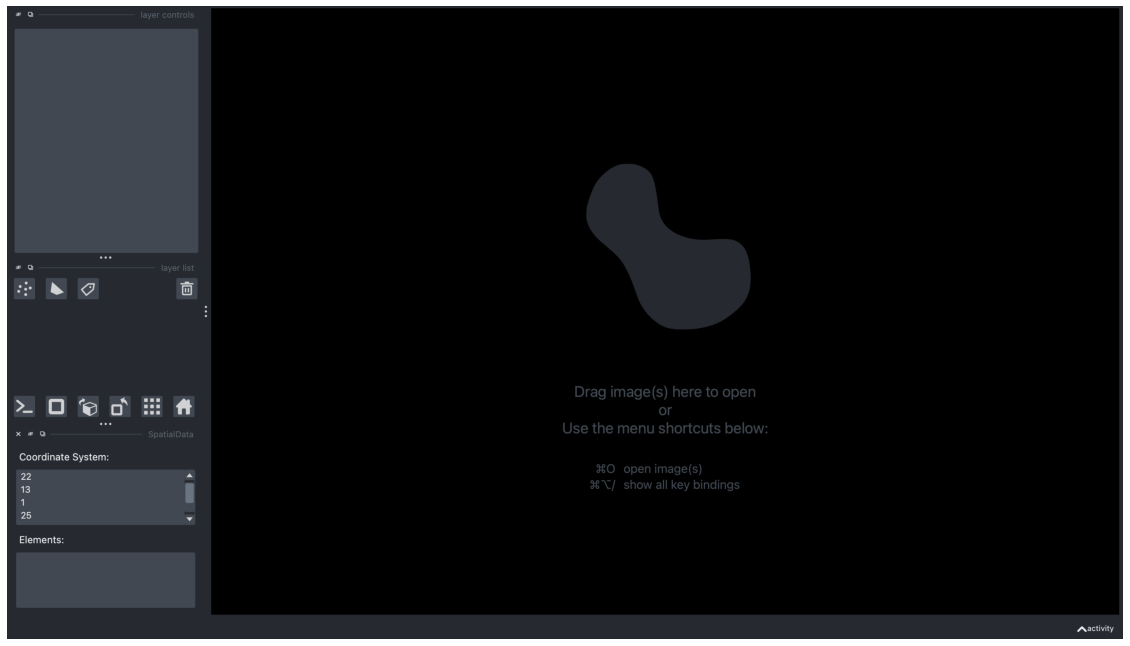

In [3]:
plt.imshow(interactive.screenshot())
plt.axis('off')

We start off by picking a coordinate system in the SpatialData box. This automatically updates the next box, which shows elements. Clicking on an element loads it as a layer into Napari.

In the image below, we've selected the coordinate system "16" and loaded "16_image" and "16_labels" to the Napari viewer.

(-0.5, 2939.5, 1665.5, -0.5)

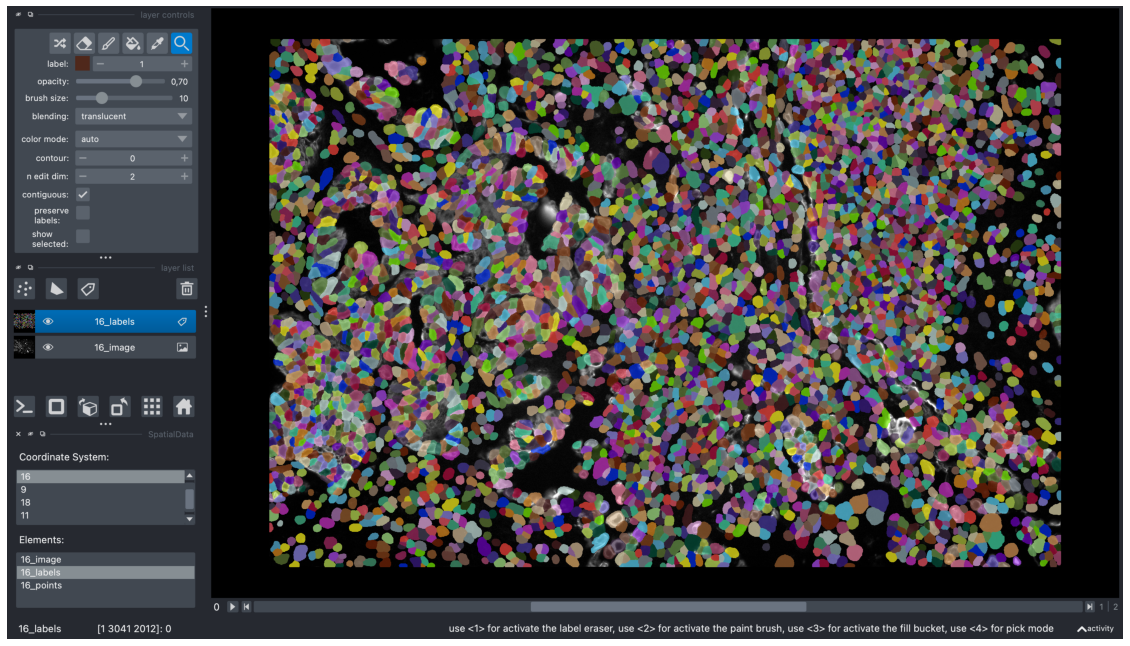

/Users/rahulbshrestha/projects/napari-spatialdata/src/napari_spatialdata/_view.py:216: FutureWarning: Private attribute access ('Selection._current') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  layer = self._viewer.layers.selection._current
2023-04-13 14:48:07.555 | INFO     | napari_spatialdata._view:_on_layer_update:204 - Updating layer.
/Users/rahulbshrestha/projects/napari-spatialdata/src/napari_spatialdata/_view.py:216: FutureWarning: Private attribute access ('Selection._current') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  layer = self._viewer.layers.selection._current
2023-04-13 14:48:07.570 | INFO     | napari_spatialdata._view:_on_layer_update:204 - Updating layer.
2023-04-13 14:48:08.521 | INFO     | napari_spatialdata._view:_on_layer_update:204 - Updating layer.
/Users/rahulbshrestha/projects/napari-spatialdata/src/napari_spatia

In [4]:
plt.imshow(interactive.screenshot(canvas_only=False))
plt.axis('off')

## Load axis with the view widget

Napari-SpatialData also comes with a "View" widget that can be used to load <em>obs</em>, <em>var</em> or <em>obsm</em>.

To open it, we use the menu bar to go from Plugins > napari-spatialdata > View.

We can see the obs, var and obsm values associated with the anndata in the selected layer.

In the example below, we've selected the element, 16_labels. Then we double clicked on the gene expression, "AATK", which loads it as a new layer into napari.

(-0.5, 2939.5, 1857.5, -0.5)

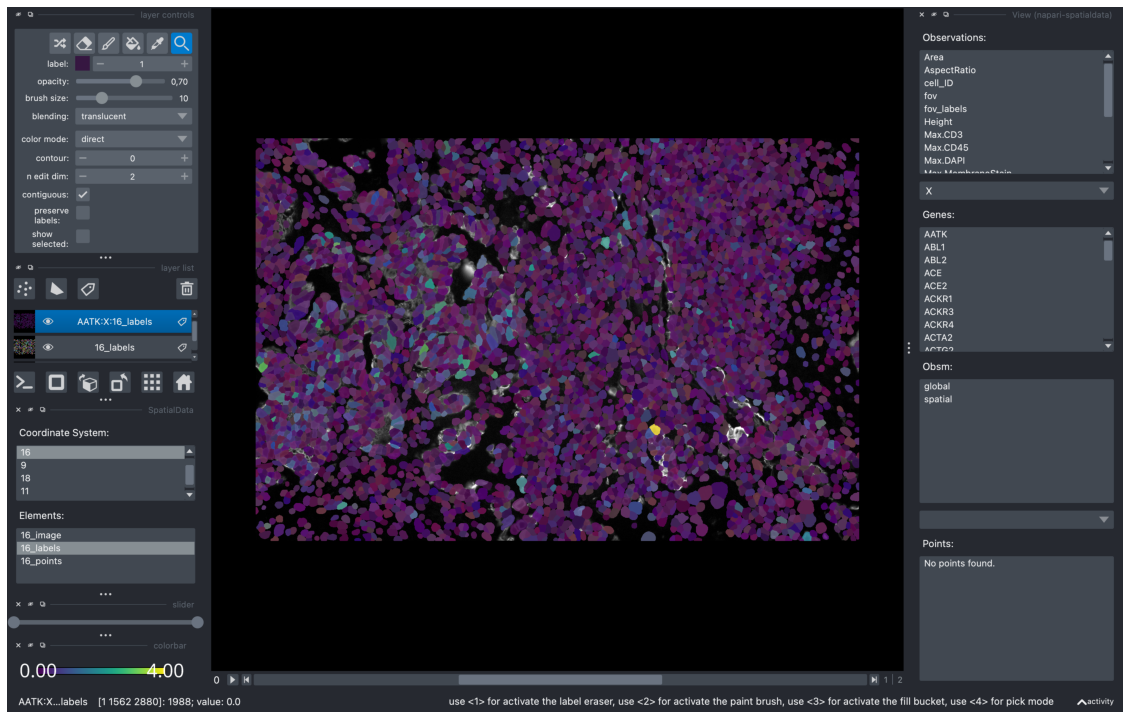

/Users/rahulbshrestha/projects/napari-spatialdata/src/napari_spatialdata/_view.py:107: FutureWarning: Private attribute access ('Selection._current') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  layer = self._viewer.layers.selection._current
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.9/site-packages/napari/_qt/menus/plugins_menu.py", line 99, in _add_toggle_widget
    self._win.add_plugin_dock_widget(*key)
  File "/opt/homebrew/lib/python3.9/site-packages/napari/_qt/qt_main_window.py", line 717, in add_plugin_dock_widget
    wdg = _instantiate_dock_widget(
  File "/opt/homebrew/lib/python3.9/site-packages/napari/_qt/qt_main_window.py", line 1364, in _instantiate_dock_widget
    return wdg_cls(**kwargs)
  File "/Users/rahulbshrestha/projects/napari-spatialdata/src/napari_spatialdata/_view.py", line 46, in __init__
    self._select_layer()
  File "/Users/rahulbshrestha/projects/napari-spati

In [5]:
plt.imshow(interactive.screenshot(canvas_only=False))
plt.axis('off')

## Load axis into scatter widget

We can also use the available scatter widget to visualise points in 2D coordinates.

We start again with a setup where we've loaded 16_labels and 16_image to the viewer.

Then, we can open the scatterplot widget from the menu bar by going to Plugins > napari-spatialdata > Scatter.

(-0.5, 2939.5, 1665.5, -0.5)

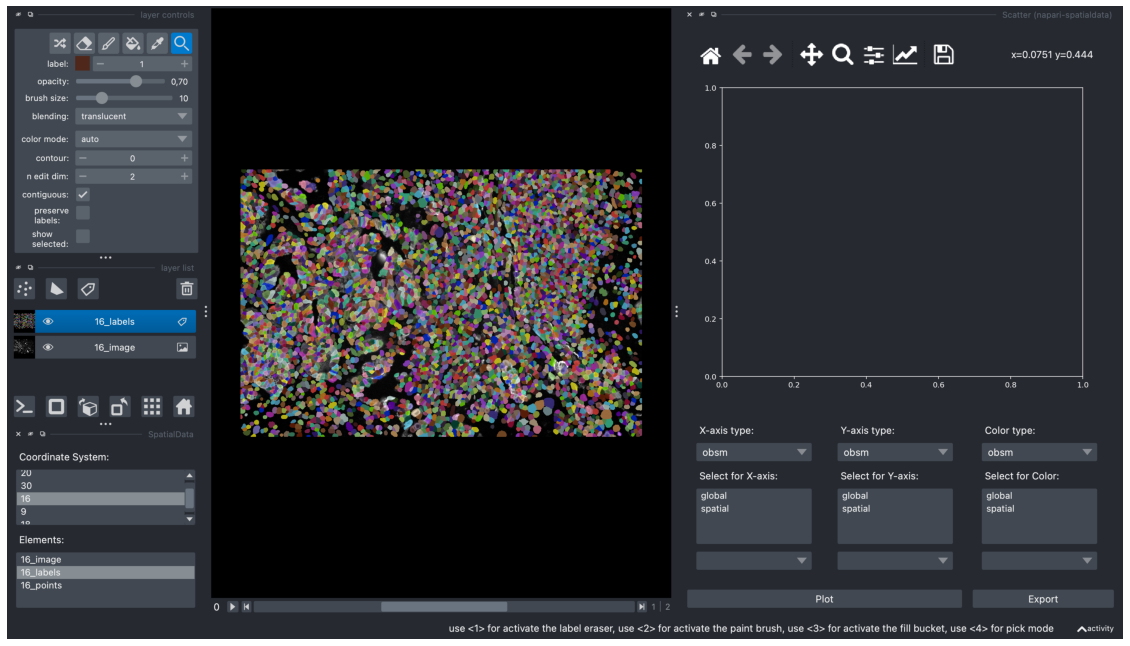

2023-04-13 14:54:24.790 | INFO     | napari_spatialdata._scatterwidgets:plot:253 - Plotting coordinates.


In [8]:
plt.imshow(interactive.screenshot(canvas_only=False))
plt.axis('off')

We can now pick axes from different AnnData columns to visualise. In the example below, we've selected <em>obsm["global"] </em>, with axis 0 in the x-axis and axis 1 in the y-axis. We're coloring each coordinate by <em>obs["cell_ID"] </em>. Once we've selected the relevant data points, clicking on "Plot" generates a scatterplot.

TODO: color by area

(-0.5, 2939.5, 1665.5, -0.5)

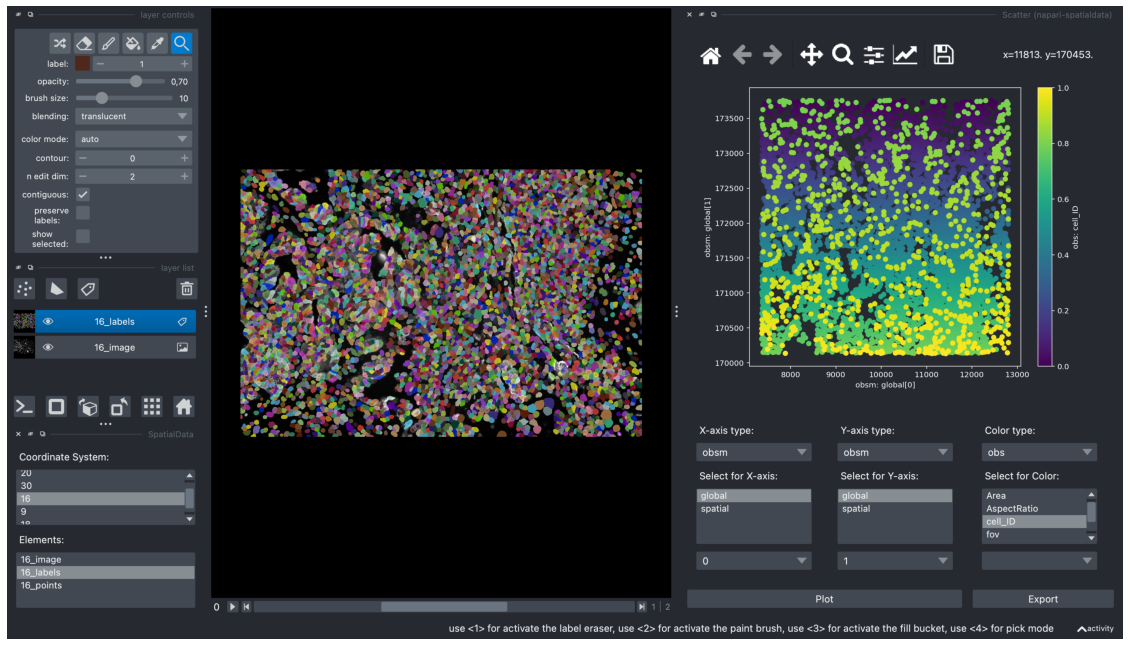

In [9]:
plt.imshow(interactive.screenshot(canvas_only=False))
plt.axis('off')

The "Scatter" widget also offers an interactive feature to manually use the cursor to select clusters of interest.

In the example below, we used our mouse cursor to select a cluster on the top left half of the scatterplot. The selected points is less transparent than the non-selected points.

(-0.5, 2939.5, 1665.5, -0.5)

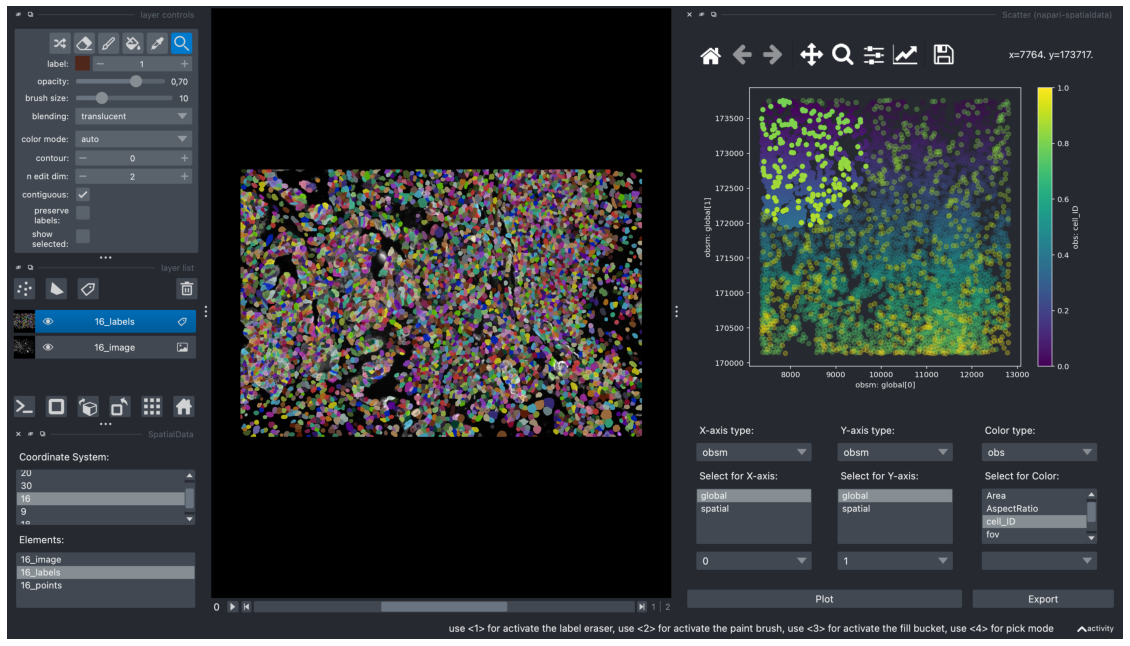

/Users/rahulbshrestha/projects/napari-spatialdata/src/napari_spatialdata/_scatterwidgets.py:96: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[obs_name] = self.exported_data
/opt/homebrew/Cellar/python@3.9/3.9.16/Frameworks/Python.framework/Versions/3.9/lib/python3.9/contextlib.py:126: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)
2023-04-13 15:00:06.884 | INFO     | napari_spatialdata._scatterwidgets:export:97 - Exported selected coordinates to obs in AnnData as: 16_labels_LASSO_SELECTED
2023-04-13 15:27:30.692 | DEBUG    | napari_spatialdata._utils:_get_categorical:132 - KEY: 16_labels_LASSO_SELECTED
2023-04-13 15:27:33.050 | INFO     | napari_spatialdata._scatterwidgets:plot:253 - Plotting coordinates.
*

In [10]:
plt.imshow(interactive.screenshot(canvas_only=False))
plt.axis('off')

After a cluster has been highlighted, it can be exported into AnnData by clicking on the "Export" button. This creates a new obs value, with the suffix "_LASSO_SELECTED"

In the example below, we've clicked on "Export" button. A new obs value is created called "16_labels_LASSO_SELECTED". We will use this as color type in our scatterplot. (Note: The obs box isn't refreshed automatically so click on obsm and back to obs). A new scatterplot is generated with the selected points.



(-0.5, 2939.5, 1665.5, -0.5)

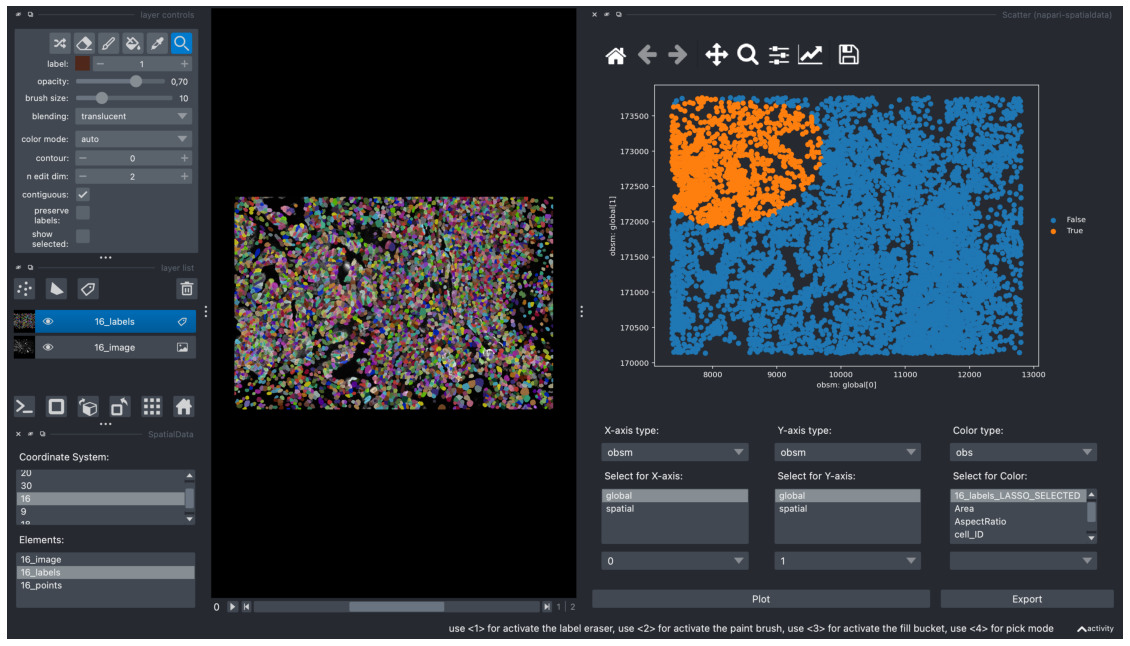

/Users/rahulbshrestha/projects/napari-spatialdata/src/napari_spatialdata/_view.py:216: FutureWarning: Private attribute access ('Selection._current') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  layer = self._viewer.layers.selection._current


In [12]:
plt.imshow(interactive.screenshot(canvas_only=False))
plt.axis('off')

We can also view this in the "View" widget and load it as a new layer. After closing this scatter widget and opening the "View" widget, we can see "16_labels_LASSO_SELECTED" in the top of "Observations".

(-0.5, 2939.5, 1857.5, -0.5)

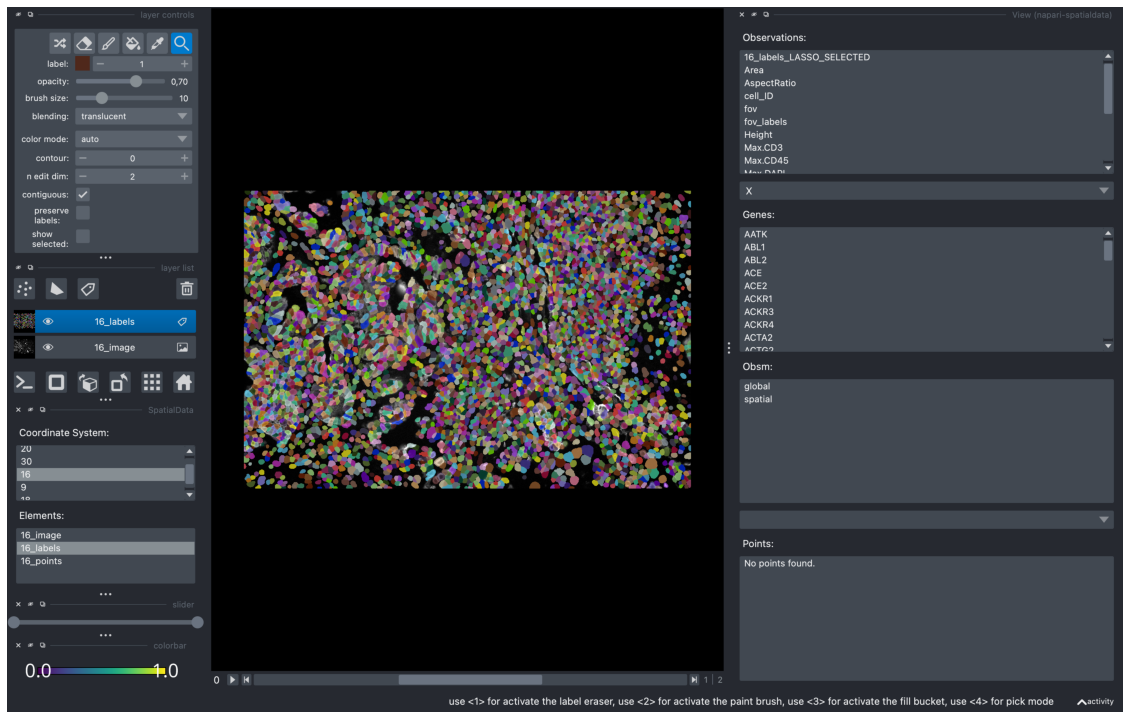

2023-04-13 15:39:08.024 | DEBUG    | napari_spatialdata._utils:_get_categorical:132 - KEY: 16_labels_LASSO_SELECTED
2023-04-13 15:39:09.587 | INFO     | napari_spatialdata._view:_on_layer_update:204 - Updating layer.
/Users/rahulbshrestha/projects/napari-spatialdata/src/napari_spatialdata/_view.py:216: FutureWarning: Private attribute access ('Selection._current') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  layer = self._viewer.layers.selection._current
2023-04-13 15:39:09.600 | INFO     | napari_spatialdata._view:_on_layer_update:204 - Updating layer.
/Users/rahulbshrestha/projects/napari-spatialdata/src/napari_spatialdata/_view.py:107: FutureWarning: Private attribute access ('Selection._current') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  layer = self._viewer.layers.selection._current
2023-04-13 15:39:09.641 | INFO     | napari_spatiald

In [13]:
plt.imshow(interactive.screenshot(canvas_only=False))
plt.axis('off')

Clicking on "16_labels_LASSO_SELECTED" loads it as a new layer to the viewer.

(-0.5, 2939.5, 1857.5, -0.5)

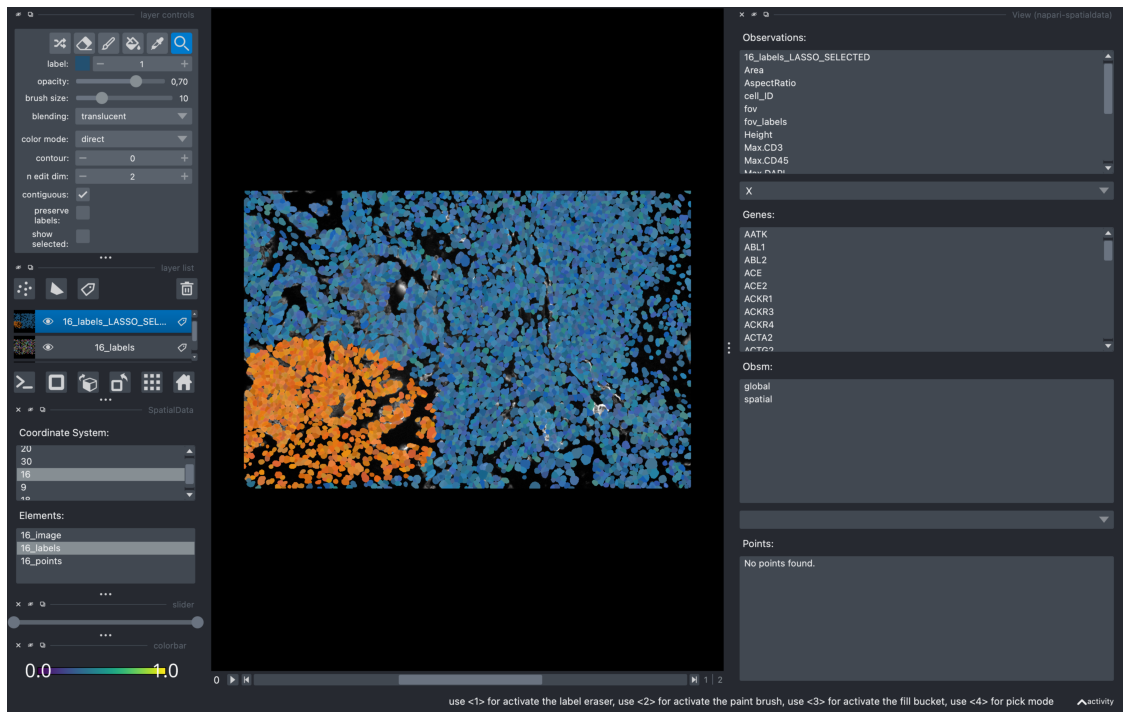

In [14]:
plt.imshow(interactive.screenshot(canvas_only=False))
plt.axis('off')